# Python Assessment

In [2]:
#import modules needed for the assessment
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit

### (a)
Generate a 101 by 101 zeros array, then add:<br>
* a flat “background”: where each pixel value is drawn from a Normal distribution with a peak value of 5 and a sigma of 3.<br>
* a 2-D Gaussian profile with a max value of 100 and centered on location (50,50) and with a sigma of 10 pixels. Each pixel should have a value added to it that is Normal distribution about the value expected from the Gaussian model (and a sigma given by the square root of that value).<br>
* another 2-D Gaussian profile  and with a max value of 20 centered on location (50,50)  and with a sigma of 3 pixels.  Each pixel should have a value added to it that is Normal distribution about the value expected from the [2nd] Gaussian model (and a sigma given by the square root of that value). <br>

Your image should look like this (colour scale not important)<br>
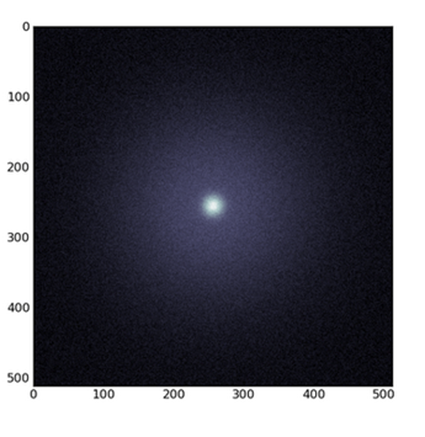



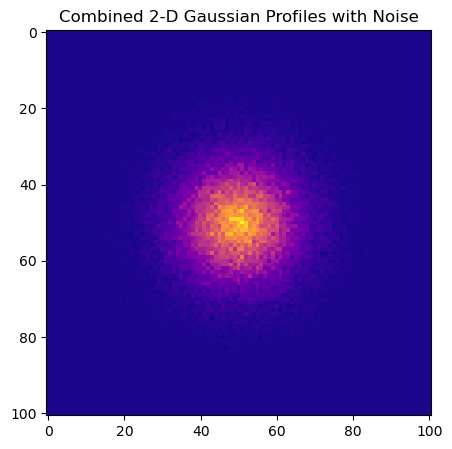

In [4]:
#create the array with background noise
zero_array= np.zeros((101,101))
noise = np.random.normal(5, 3, zero_array.shape)

#add the 2D Gaussians with noise to the data
def gaussian(zero_array, max_value, center, sigma):
    x= np.linspace(0, zero_array.shape[0]-1, zero_array.shape[0])
    y= np.linspace(0, zero_array.shape[1]-1, zero_array.shape[1])
    x, y= np.meshgrid(x, y)
    gaussian_profile = max_value*np.exp(-((x-center[0])**2+(y-center[1])**2)/(2*sigma**2))
    noise= np.random.normal(loc=0, scale=np.sqrt(gaussian_profile), size= zero_array.shape)
    zero_array+= gaussian_profile + noise
    return zero_array

zero_array= gaussian(zero_array, max_value=100, center=(50, 50), sigma=10)
zero_array= gaussian(zero_array, max_value=20, center=(50, 50), sigma=3)

# Plot the result
plt.figure(figsize=(5, 5))
plt.imshow(zero_array, cmap='plasma')
plt.title('Combined 2-D Gaussian Profiles with Noise')
plt.show()

### (b)

Generate a 1-D profile from your array. This can be either a single row of pixel values or a sum of rows.

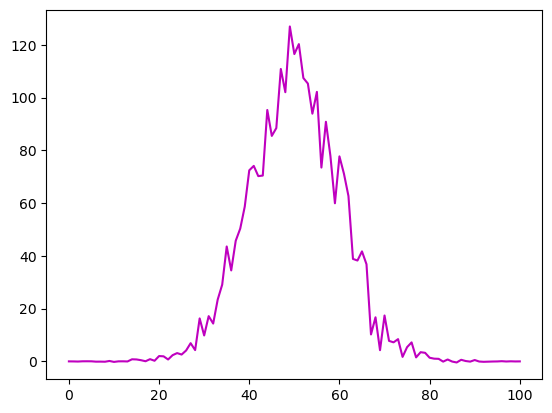

In [6]:
#generate and plot a 1D profile of the previous array
profile= zero_array[:, 50]

plt.plot(profile, color= "m")
plt.show()

### (c)

Fit a double Gaussian to your 1-D profile, and plot the best model on top of the 1-D profile. This is hard.<br> Skip this bit if needs be and come back to it.

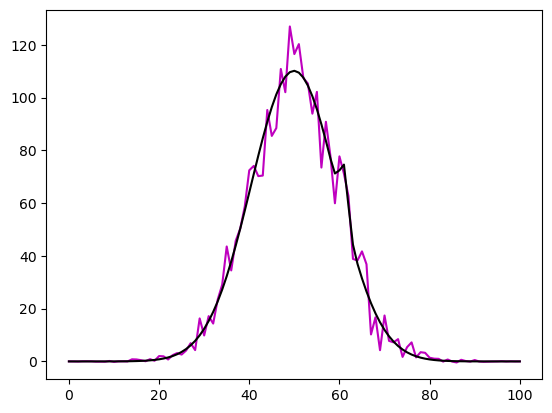

In [8]:
#define the double gaussian
def double_gauss_fit(x, center1, max_val1, sigma1, center2, max_val2, sigma2):
    first= max_val1*np.exp(-(x-center1)**2/(2 * sigma1**2))
    second= max_val2*np.exp(-(x-center2)**2/(2 * sigma2**2))
    return first+second

p0= (50, 90, 10, 60, 40, 3)
popt, pcov = curve_fit(double_gauss_fit, np.arange(profile.shape[0]), profile, p0=p0)


#plot both the profile and the gaussian fit
plt.plot(profile, color='m')
plt.plot(double_gauss_fit(np.arange(profile.shape[0]),*popt), color='k')
plt.show()

### (d)

Repeat exercise (a), but use Poisson distribution for the background and the 2nd Gaussian (i.e. it is not possible for the value to drop below 0).


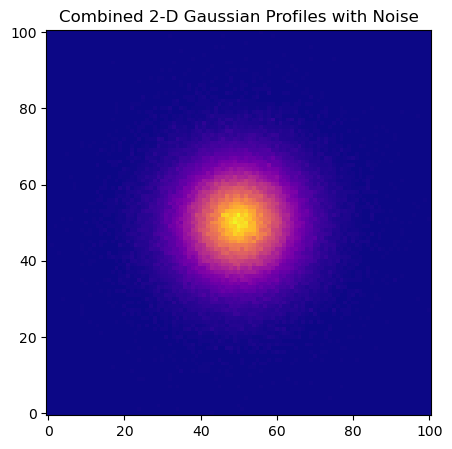

In [10]:
#create the array with background noise
zero_array= np.zeros((101,101))
noise = np.random.normal(5, 3, zero_array.shape)

#add the 2D Gaussians with noise to the data
def gaussian(zero_array, max_value, center, sigma):
    x = np.linspace(0, zero_array.shape[0]-1, zero_array.shape[0])
    y = np.linspace(0, zero_array.shape[1]-1, zero_array.shape[1])
    x, y = np.meshgrid(x, y)
    gaussian_profile = max_value*np.exp(-((x-center[0])**2+(y-center[1])**2)/(2*sigma**2))
    noise = np.random.poisson(np.sqrt(gaussian_profile))
    zero_array += gaussian_profile + noise
    return zero_array

zero_array = gaussian(zero_array, max_value=100, center=(50, 50), sigma=10)
zero_array = gaussian(zero_array, max_value=20, center=(50, 50), sigma=3)

# Plot the result
plt.figure(figsize=(5, 5))
plt.imshow(zero_array, cmap='plasma', origin='lower')
plt.title('Combined 2-D Gaussian Profiles with Noise')
plt.show()

### (e)

Consider a 101 by 101 array:
+ Generate a list of several thousand random locations within your such array, e.g. [(3,75),(56,34)]
- Calculate how often one of your random locations falls within 10 pixels of any of the (straight) edges.
* Calculate how often one of your random locations falls in either of these regions: a) outside a circle with radius 40 pixels, b) within 10 pixels of the inside of circle.

To check, probabilities should be approximately : a) 0.5, b) 0.22

In [12]:
#create an array of random locations
num_loc= 2000
random_loc= [(random.randint(0, 100), random.randint(0, 100)) for i in range(num_loc)]

#calculate how often the locations fall within 10 pixels
counter= 0
for x,y in random_loc:
    if (10<x<90) and (10<y<90):
        pass
    else:
        counter+= 1
print('How often one of the random locations falls within 10 pixels of any of the straight edges:', counter)

#calculate how often the locations fall outside a circle of r= 40 pixels and the probability
out_counter= 0
for x,y in random_loc:
    distance= np.sqrt((x-50)**2+(y-50)**2)
    if distance>40:
        pass
    else:
        out_counter+=1
print('How often one of the random locations falls outside a circle with radius 40 pixels:', out_counter)
print('Probability of how often one of the random locations falls outside a circle with radius 40 pixels:', out_counter/num_loc)

#calculate how often the locations fall within 10 pixels of inside the circle and the probability
in_counter= 0
for x,y in random_loc:
    distance= np.sqrt((x-50)**2+(y-50)**2)
    if 30<distance<=40:
        in_counter+=1
    else:
        pass
print('How often one of the random locations falls within 10 pixels of the inside of the circle:', in_counter)
print('Probability of how often one of the random locations falls within 10 pixels of the inside of the circle:', in_counter/num_loc)

How often one of the random locations falls within 10 pixels of any of the straight edges: 788
How often one of the random locations falls outside a circle with radius 40 pixels: 974
Probability of how often one of the random locations falls outside a circle with radius 40 pixels: 0.487
How often one of the random locations falls within 10 pixels of the inside of the circle: 408
Probability of how often one of the random locations falls within 10 pixels of the inside of the circle: 0.204


### (f)

Ask the user to input a location and let them know if that location is in one of the two regions in (e)- ••• . Allow repeat submissions, and allow the user to tell you when they want to move on.

In [14]:
#define a function to check the location
def check_loc(x, y):
    if (10<x<90) and (10<y<90):
        return 'The location falls within 10 pixels of any of the straight edges'
        
    distance= np.sqrt((x-50)**2+(y-50)**2)
    if distance>40:
        return 'The location falls outside a circle with radius 40 pixels'
    if 30<distance<=40:
        return 'The location falls within 10 pixels of the inside of the circle'

#define a function to let the user submit multiple entries
def main():
    while True:
        try:
            x= int(input('Enter a x integer value between 0 and 100: '))
            y= int(input('Enter a y integer value between 0 and 100: '))
            result= check_loc(x, y)
            print(result)
            
        except:
            print('Enter an integer value between 0 and 100')
        
        move_on= input('Do you want to input another location (yes or no)?: ').strip().lower()
        if move_on != 'yes':
            break

if __name__== '__main__':
    main()

Enter a x integer value between 0 and 100:  45
Enter a y integer value between 0 and 100:  67


The location falls within 10 pixels of any of the straight edges


Do you want to input another location (yes or no)?:  no


### (g)

Generate a 101 by 101 array, then:
* add 3 synthetic “sources” by taking random locations and generating 2-D Gaussians around each one. Start with a peak value of 10 and a sigma of 3 (below left).
* Then add a noisy background that has a mean value of 3 and a sigma of 1 (below middle).
* Then set all values (sources and background) to zero outside a circle of radius 40 pixels (below right).
* Repeat 2 times (to make 6 images in total). Display all the images to the screen.


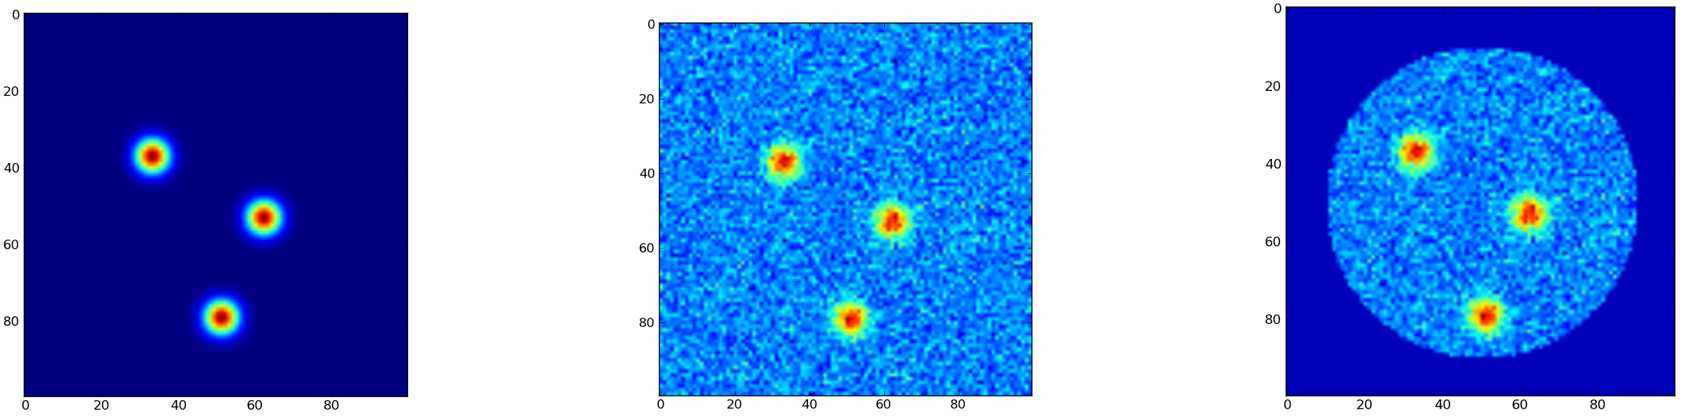


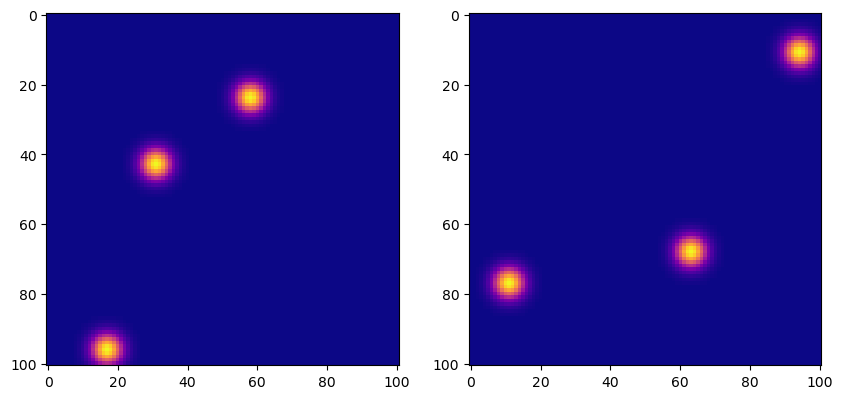

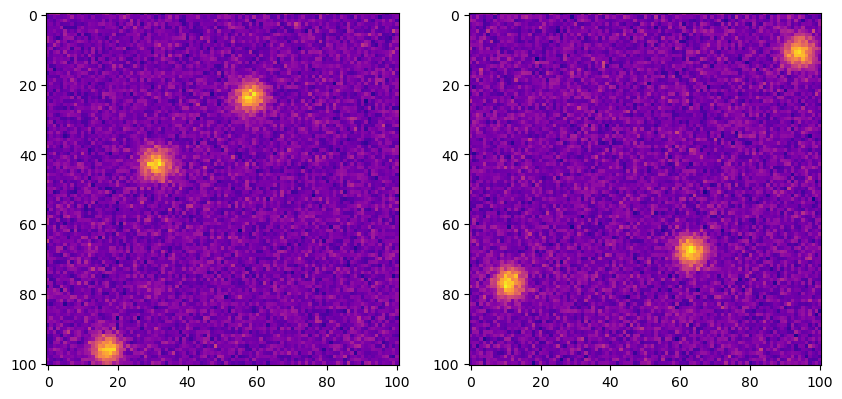

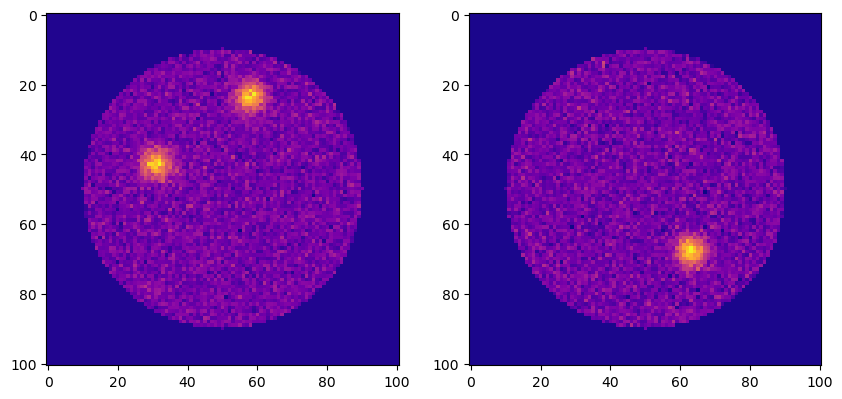

In [16]:
#create an array with 3 random sources and a 2D Gaussian
def gaussian(zero_array, center_x, center_y, max_value, sigma):
    x= np.linspace(0, zero_array.shape[0]-1, zero_array.shape[0])
    y= np.linspace(0, zero_array.shape[1]-1, zero_array.shape[1])
    x, y= np.meshgrid(x, y)
    gaussian_profile = max_value*np.exp(-((x-center_x)**2+(y-center_y)**2)/(2*sigma**2))
    zero_array += gaussian_profile 

max_value= 10
sigma= 3
def source_images():
    zero_array= np.zeros((101, 101))
    for i in range(3):
        center_x = np.random.randint(0, 101)
        center_y = np.random.randint(0, 101)
        gaussian(zero_array, center_x, center_y, max_value, sigma)
    return zero_array

#define a function to add background noise
def noise(zero_array):
    background_noise= np.random.normal(3, 1, zero_array.shape)
    return zero_array+background_noise

#define a function to add a circular mask
def circle(zero_array):
    array_size= zero_array.shape[0]
    y, x= np.ogrid[:101, :101]
    center= (101//2, 101//2)
    radius= 40
    mask= (x-center[0])**2+(y-center[1])**2<=radius**2
    zero_array[~mask]= 0
    return zero_array


images_with_sources= [source_images() for i in range(2)]

#plot the images with just the sources
plt.figure(figsize=(10, 5))
for i, img in enumerate(images_with_sources):
    plt.subplot(1, 2, i + 1)
    plt.imshow(img, cmap='plasma')
plt.show()


images_with_background = [noise(img.copy()) for img in images_with_sources]

#plot the images with the background
plt.figure(figsize=(10, 5))
for i, img in enumerate(images_with_background):
    plt.subplot(1, 2, i+1)
    plt.imshow(img, cmap='plasma')
plt.show()


final_images = [circle(img.copy()) for img in images_with_background]

#plot the images with the mask
plt.figure(figsize=(10, 5))
for i, img in enumerate(final_images):
    plt.subplot(1, 2, i+1)
    plt.imshow(img, cmap='plasma')
plt.show()

### (h)

Run through each of your six images and alert the user if any of the sources therein falls within 10 pixels of the inside edge of your 40 pixel circle or in the “zero’d” region outside. [You will have to preserve the locations you used to generate the 6x3 sources]

### (i)

Tell the user what percentage of the signal from each source fell into the "zero" region outside the circle. For that last bit, you can use your knowledge of the source location, normalisation and sigma [look up “volume under the gaussian function” in Wikipedia].

### (j)
Switch to circularly symmetric “Beta-models’’  (see equation below) for your shapes and repeat steps (g),(h),(i)

$$ y=S_0(1 + (r/r_0)^2 )^{-1.5} $$
where r is the radius from the centre, $r_0$ is the “core” [use $r_0$=3 for now], $S_0$ is the normalisation [use 10 for now]. Note that the equivalent of step (i) is harder than before because you will need to numerically integrate [rather than using an analytical formula]


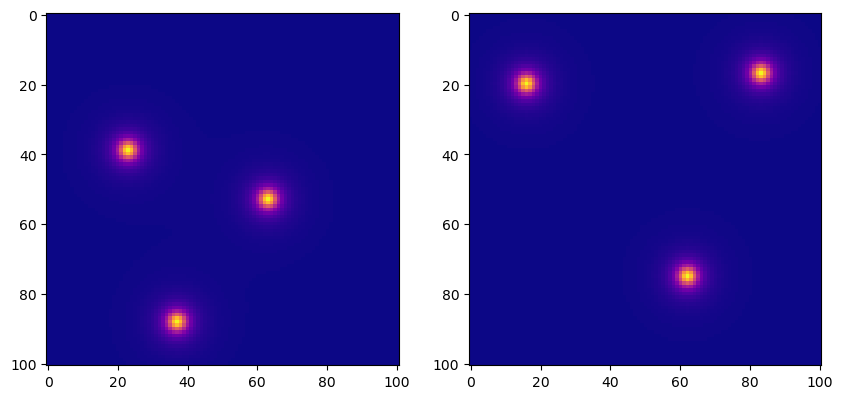

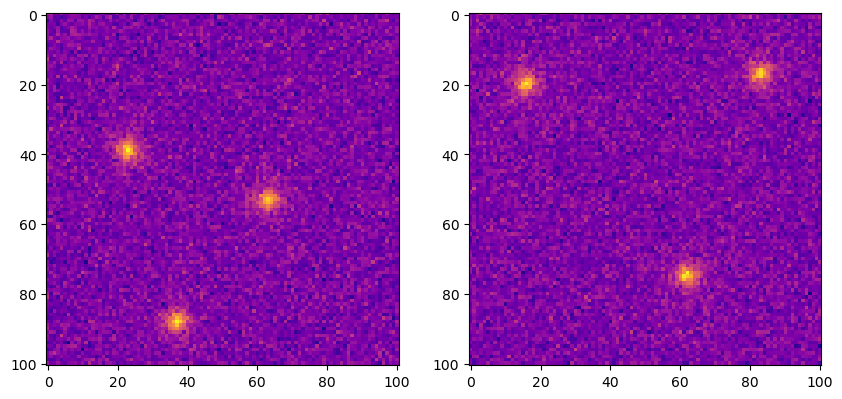

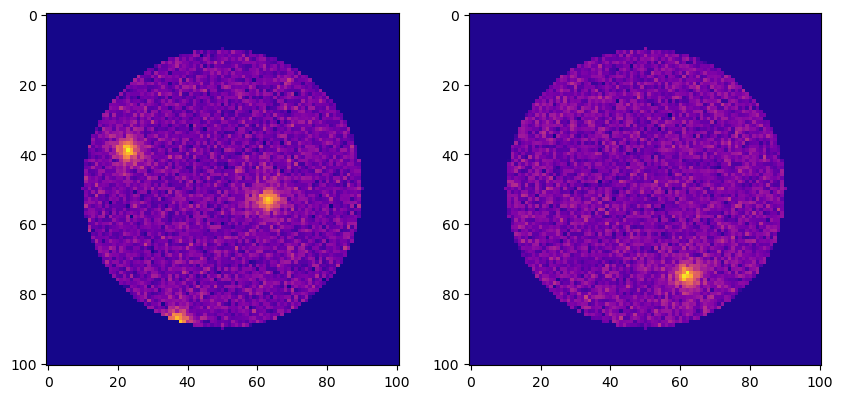

In [20]:
#create an array with 3 random sources and a beta model
def beta_model(zero_array, center_x, center_y, S0, r0):
    x= np.linspace(0, zero_array.shape[0]-1, zero_array.shape[0])
    y= np.linspace(0, zero_array.shape[1]-1, zero_array.shape[1])
    x, y= np.meshgrid(x, y)

    r= np.sqrt((x-center_x)**2+(y-center_y)**2)
    beta= S0*(1+(r/r0)**2)**-1.5
    zero_array+= beta 

S0= 10
r0= 3
def source_images():
    zero_array= np.zeros((101, 101))
    for i in range(3):
        center_x = np.random.randint(0, 101)
        center_y = np.random.randint(0, 101)
        beta_model(zero_array, center_x, center_y, S0, r0)
    return zero_array

#define a function to add background noise
def noise(zero_array):
    background_noise= np.random.normal(3, 1, zero_array.shape)
    return zero_array+background_noise

#define a function to add a circular mask
def circle(zero_array):
    array_size= zero_array.shape[0]
    y, x= np.ogrid[:101, :101]
    center= (101//2, 101//2)
    radius= 40
    mask= (x-center[0])**2+(y-center[1])**2<= radius**2
    zero_array[~mask]= 0
    return zero_array
    

images_with_sources= [source_images() for i in range(2)]

#plot the images with just the sources
plt.figure(figsize=(10, 5))
for i, img in enumerate(images_with_sources):
    plt.subplot(1, 2, i + 1)
    plt.imshow(img, cmap='plasma')
plt.show()


images_with_background = [noise(img.copy()) for img in images_with_sources]

#plot the images with the background 
plt.figure(figsize=(10, 5))
for i, img in enumerate(images_with_background):
    plt.subplot(1, 2, i+1)
    plt.imshow(img, cmap='plasma')
plt.show()


final_images = [circle(img.copy()) for img in images_with_background]

#plot the images with the mask
plt.figure(figsize=(10, 5))
for i, img in enumerate(final_images):
    plt.subplot(1, 2, i+1)
    plt.imshow(img, cmap='plasma')
plt.show()

### (k)

Produce an image “with vignetting”: i.e. now the sensitivity of the “detector” is decreasing radially from 100% in the centre to 50% at the far corner. The functional form of this decrease is linear. Note that your background is not vignetted (so the expectation value does not change across the detector).

### (l)

repeat (j) when $1<r_0<5$ with a flat (constant) probability distribution and a well-known center. Since we don’t know what our value for $r_0$ is, we will make the assumption that $r_0$=3. Return the error in making this assumption. 

### (m)

similar to (l), but now you can know what your r0 value is, but you don’t know where the centre is. You can guess the centre using the brightest pixel in the “active” area, i.e. inside our circle. Return the error on your percentage of lost flux.